In [443]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor, XGBRFRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import GradientBoostingRegressor 
from time import time

from sklearn.metrics import r2_score, mean_squared_error

from sklearn.model_selection import KFold

from xgboost import plot_tree

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Ingestion

In [444]:
df=pd.read_csv('autos.csv', encoding = "ISO-8859-1" )

## Data Exploration

In [445]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [446]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
dateCrawled            371528 non-null object
name                   371528 non-null object
seller                 371528 non-null object
offerType              371528 non-null object
price                  371528 non-null int64
abtest                 371528 non-null object
vehicleType            333659 non-null object
yearOfRegistration     371528 non-null int64
gearbox                351319 non-null object
powerPS                371528 non-null int64
model                  351044 non-null object
kilometer              371528 non-null int64
monthOfRegistration    371528 non-null int64
fuelType               338142 non-null object
brand                  371528 non-null object
notRepairedDamage      299468 non-null object
dateCreated            371528 non-null object
nrOfPictures           371528 non-null int64
postalCode             371528 non-null int64
lastSeen              

In [447]:
df.isnull().sum() # there are lots of null values

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

## Statistical summary

In [448]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


- price seems to be 0 for for rows
- year of registration ranges till 9999 but 75% values lie till 2008
- powerPS stars from 0
- monthOfRegistration starts from 0, seems suspicious
- nrOfPictures is 0 for all rows, so not relevant
- postal code starts from 4 digits code, not essentially a numerical data

# Data Exploration 

## Continuous Variable

In [449]:
plt.style.use('ggplot')

Text(0, 0.5, 'Frequency')

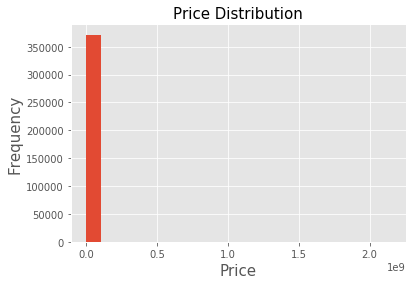

In [450]:
df['price'].plot(kind='hist', bins=20)
plt.title('Price Distribution',size=15)
plt.xlabel('Price', size=15)
plt.ylabel('Frequency', size=15)

- Price has wide variance, likely to be an outlier scenario. Needs handling

Text(0, 0.5, 'Frequency')

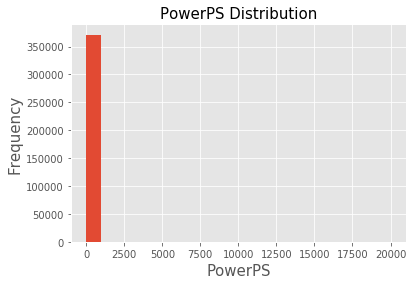

In [451]:
df['powerPS'].plot(kind='hist',bins=20)
plt.title('PowerPS Distribution', size=15)
plt.xlabel('PowerPS', size=15)
plt.ylabel('Frequency', size=15)

- Similarly PowerPS has wide variance, likely to be an outlier scenario. Needs handling

Text(0.5, 0, 'Year of Registration')

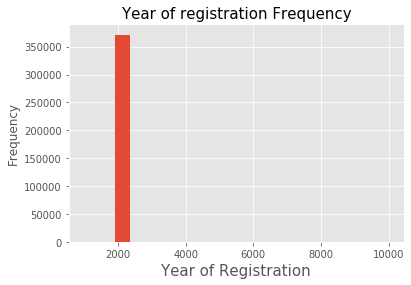

In [452]:
df['yearOfRegistration'].plot(kind='hist', bins=20)
plt.title('Year of registration Frequency',size=15)
plt.xlabel('Year of Registration',size=15)

- Similarly year of registration has wide variance, likely to be an outlier scenario. Needs handling

## Delete outlier < Q1 -1.5 IQR and > Q3 + 1.5 IQR

In [453]:
def delete_outlier(col, df):
    q1 = df[c].quantile(.25)
    q3 = df[c].quantile(.75)
    mask = df[c].between(q1, q3, inclusive=True)
    df = df.loc[mask]
    return (df)

# drop outliers i.e. < +- 1.5IQR
l = ['powerPS', 'price', 'yearOfRegistration']
for c in l:
    df=delete_outlier(c, df)
    print (df.shape)

(199804, 20)
(100826, 20)
(58645, 20)


Text(0.5, 1.0, 'Year of registration distribution')

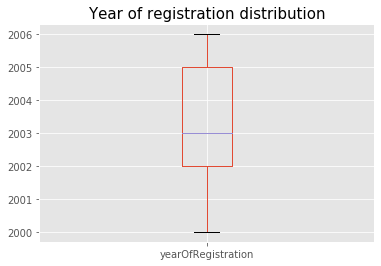

In [454]:
# checking data distrbution
df['yearOfRegistration'].plot(kind='box')
plt.title('Year of registration distribution',size=15)

## Data has is well balanced now

## Categorical Variables

In [455]:
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [456]:
df["seller"].value_counts() # only 3 rows with different seller so this feature is irrelevant

privat    58645
Name: seller, dtype: int64

In [457]:
df["offerType"].value_counts() # only 12 rows are different so not useful

Angebot    58644
Gesuch         1
Name: offerType, dtype: int64

In [458]:
df["nrOfPictures"].value_counts() # all rows are 0 so not a significant

0    58645
Name: nrOfPictures, dtype: int64

## Handle Null data

In [459]:
df.isnull().sum()

dateCrawled               0
name                      0
seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType             747
yearOfRegistration        0
gearbox                 753
powerPS                   0
model                  1532
kilometer                 0
monthOfRegistration       0
fuelType               2139
brand                     0
notRepairedDamage      7572
dateCreated               0
nrOfPictures              0
postalCode                0
lastSeen                  0
dtype: int64

In [460]:
""" At this point most features are forward filled with the last valid values. However more optimized way to handle 
such cases is to find correlation between data columns based on business knowledge, SME etc. 
"""

df['vehicleType'].ffill(inplace=True)
df['gearbox'].ffill(inplace=True)
df["model"].ffill(inplace = True)
df["fuelType"].ffill(inplace = True)
df["notRepairedDamage"].fillna("nein",inplace = True)

In [461]:
df.isnull().sum()

dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
nrOfPictures           0
postalCode             0
lastSeen               0
dtype: int64

## All nulls are removed

In [462]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
10,2016-03-26 19:54:18,Mazda_3_1.6_Sport,privat,Angebot,2000,control,limousine,2004,manuell,105,3_reihe,150000,12,benzin,mazda,nein,2016-03-26 00:00:00,0,96224,2016-04-06 10:45:34
11,2016-04-07 10:06:22,Volkswagen_Passat_Variant_2.0_TDI_Comfortline,privat,Angebot,2799,control,kombi,2005,manuell,140,passat,150000,12,diesel,volkswagen,ja,2016-04-07 00:00:00,0,57290,2016-04-07 10:25:17
13,2016-03-21 21:37:40,VW_PASSAT_1.9_TDI_131_PS_LEDER,privat,Angebot,2500,control,kombi,2004,manuell,131,passat,150000,2,diesel,volkswagen,nein,2016-03-21 00:00:00,0,90762,2016-03-23 02:50:54


## Dropping columns which have been found less relevant during data exploration steps above

In [463]:
# Dropping columns which have been found less relevant during data exploration
cols_to_drop=['seller','offerType','nrOfPictures', 'name','dateCrawled','lastSeen','dateCreated', 'postalCode']
df.drop(cols_to_drop, axis=1, inplace=True)
df.head()

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
3,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
6,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein
10,2000,control,limousine,2004,manuell,105,3_reihe,150000,12,benzin,mazda,nein
11,2799,control,kombi,2005,manuell,140,passat,150000,12,diesel,volkswagen,ja
13,2500,control,kombi,2004,manuell,131,passat,150000,2,diesel,volkswagen,nein


In [464]:
category_feat = [c for c in df.columns if df[c].dtype =='object']
category_feat

['abtest',
 'vehicleType',
 'gearbox',
 'model',
 'fuelType',
 'brand',
 'notRepairedDamage']

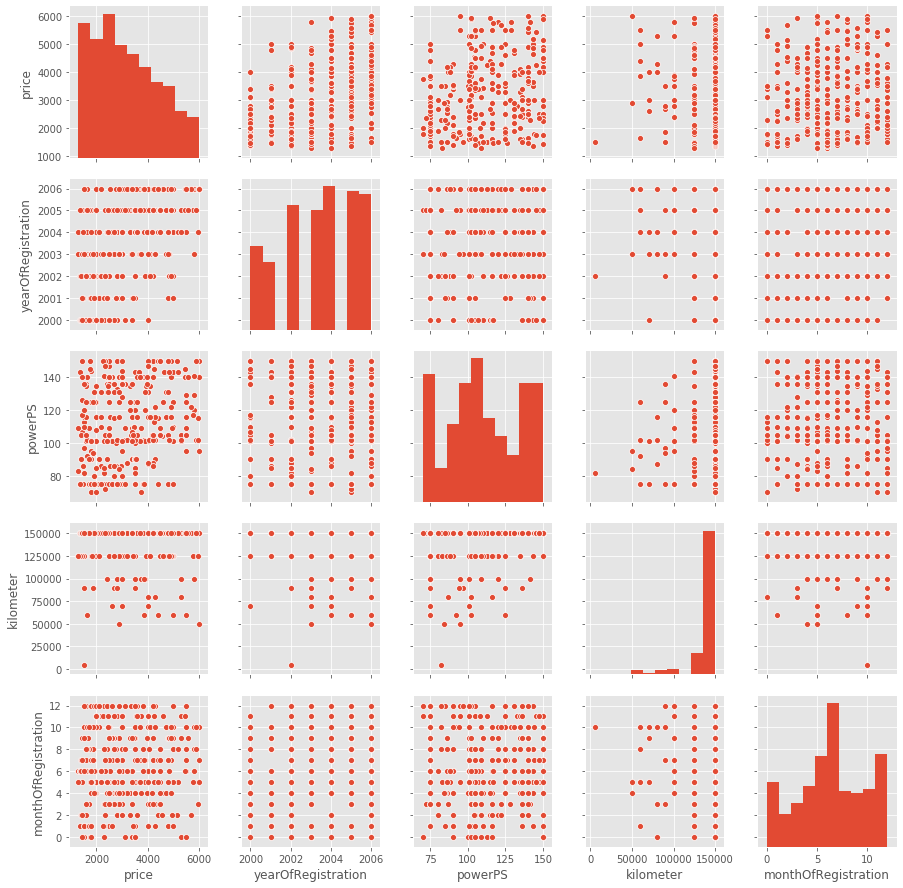

In [465]:
# see pairplot among features.
g = sns.pairplot(df.sample(300))
plt.show()

## Data Visualization

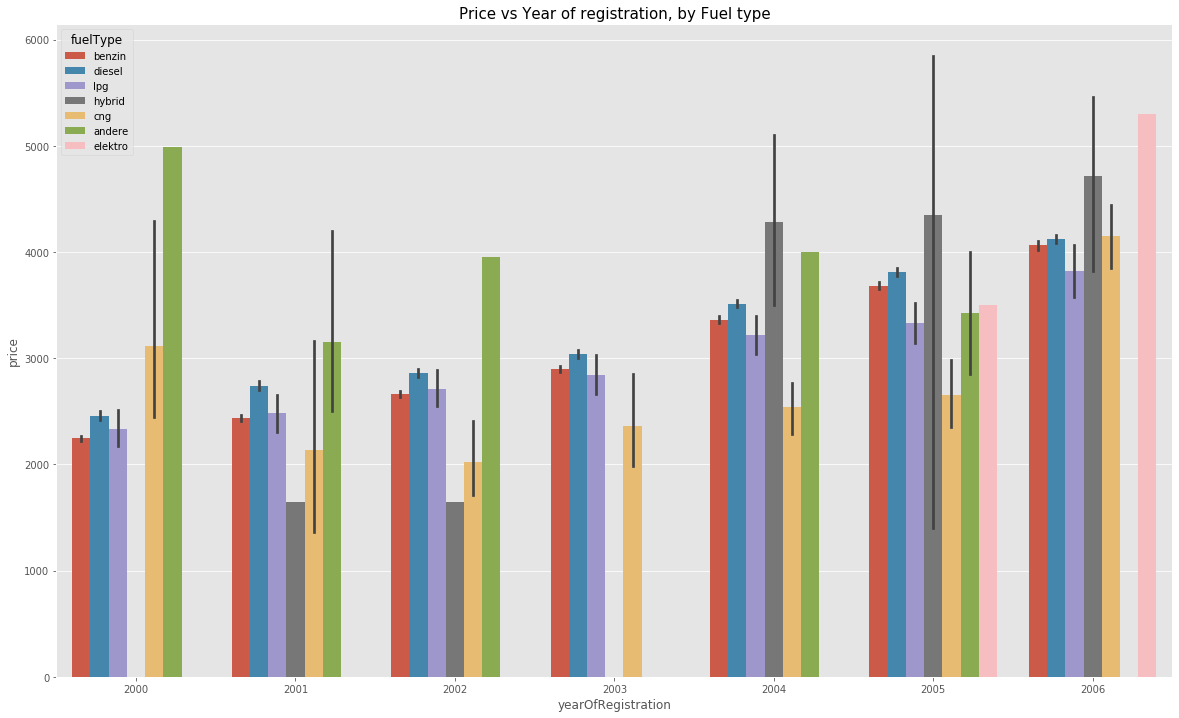

In [466]:
plt.figure(figsize=(20,12))
plt.title('Price vs Year of registration, by Fuel type',size=15)
g=sns.barplot( x='yearOfRegistration', y='price', hue='fuelType', data=df)

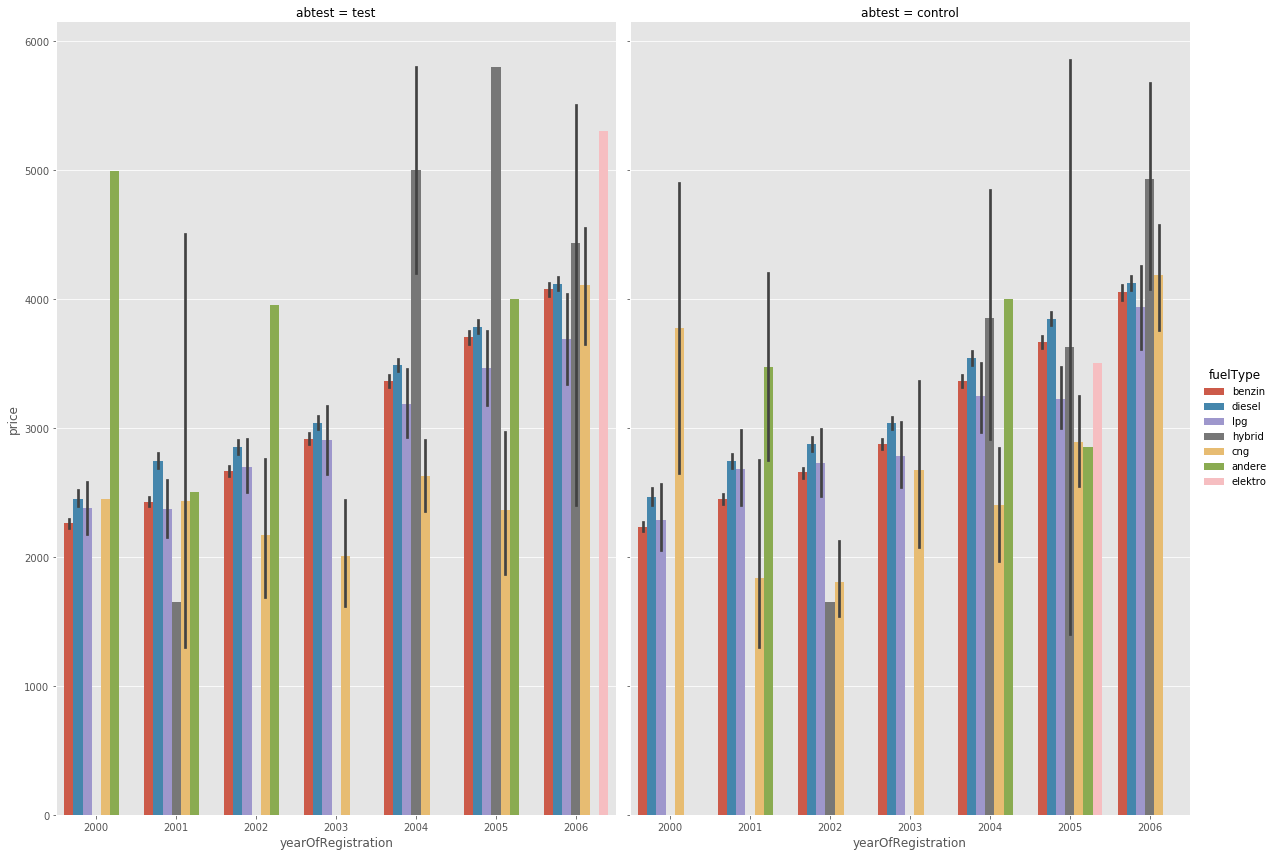

In [467]:
# differnece in Control vs. treatment
g=sns.catplot( x='yearOfRegistration', y='price', hue='fuelType', col="abtest",kind="bar",data=df, 
          height=12, aspect=.7)

- There are significant differences between control and treatment prices by fuel-type over the years.

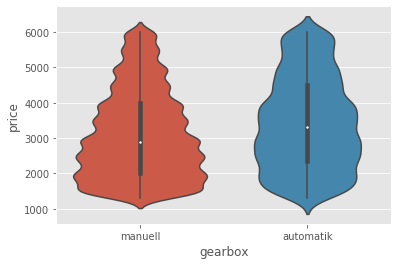

In [468]:
sns.violinplot(x='gearbox', y='price', data=df)

### Gearbox = manuell has lower price distribution then automatic. Density of manual grearbox is around lower price. Automatic gears have well spread price range

## Data Preparation

In [469]:
# using label encoder for encoding categorical features.

data = df.copy()
data["vehicleType"] =LabelEncoder().fit_transform(data["vehicleType"])
data["fuelType"] =LabelEncoder().fit_transform(data["fuelType"])
data["gearbox"] =LabelEncoder().fit_transform(data["gearbox"])
data["notRepairedDamage"] =LabelEncoder().fit_transform(data["notRepairedDamage"])
data["brand"] =LabelEncoder().fit_transform(data["brand"])
data["model"] =LabelEncoder().fit_transform(data["model"])
data["abtest"] =LabelEncoder().fit_transform(data["abtest"])

In [470]:
data.head()

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
3,1500,1,4,2001,1,75,82,150000,6,1,36,1
6,2200,1,2,2004,1,109,6,150000,8,1,25,1
10,2000,0,6,2004,1,105,7,150000,12,1,19,1
11,2799,0,5,2005,1,140,122,150000,12,3,36,0
13,2500,0,5,2004,1,131,122,150000,2,3,36,1


## Correlation Matrix

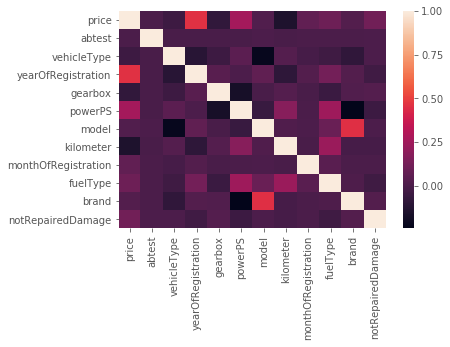

In [471]:
# finally see correlation among features 
sns.heatmap(data.corr())

- Price is highly correlate to kilometers, year of registration
- vehicle type is correlated to model
- gearbox is correlated to powerPS
- powerPS is related to brand
### Above relationships make sense for an auto industry data. 

## Model building

In [472]:
## select X, independent dataset and Y, dependent dataset. 
X= data.drop('price' , axis=1)
Y= data['price']

In [473]:
X.head()

,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
3,1,4,2001,1,75,82,150000,6,1,36,1
6,1,2,2004,1,109,6,150000,8,1,25,1
10,0,6,2004,1,105,7,150000,12,1,19,1
11,0,5,2005,1,140,122,150000,12,3,36,0
13,0,5,2004,1,131,122,150000,2,3,36,1


In [474]:
# train-test split for 80% as training data 20% as test data 
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.20, random_state=42)

## Linear regression

In [475]:
# Create a data frame for storing results from all model
summary_df = pd.DataFrame(index = ['R-squared', 'Mean-Absolute-Error', 'Root-Mean-Squared-Error'])

In [476]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

r2= r2_score(y_test, y_pred)
mae= np.mean(abs(y_test-y_pred))
rmse=np.sqrt(np.mean((y_test-y_pred)**2))
summary_df['Linear Regression'] = [r2, mae, rmse]
summary_df

,Linear Regression
R-squared,0.344134
Mean-Absolute-Error,811.040128
Root-Mean-Squared-Error,1013.859763


### plot residual charts for stakeholders to provide insight that this model is not good.

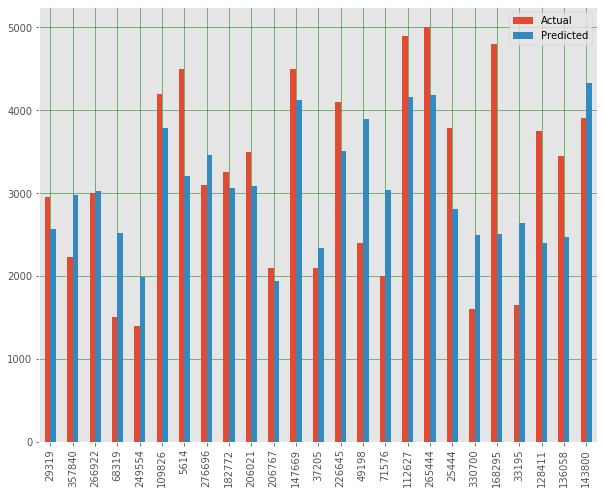

In [477]:
df_result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df_result.head(25)

df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Text(0.5, 1.0, 'Actual vs. Predicted Price')

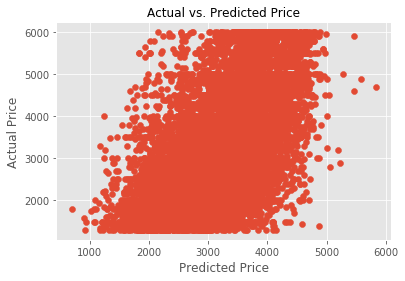

In [478]:
plt.scatter( y_pred, y_test)
plt.xlabel('Predicted Price', size=12)
plt.ylabel('Actual Price', size=12)
plt.title('Actual vs. Predicted Price', size=12)

- As the scatter plot is not linear so it violates the assumptions of linear model, i.e. constact variance. Try regularization model for polynomial regression. 

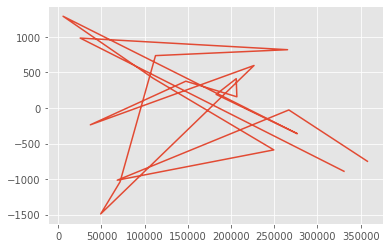

In [479]:
# top 20 values, not a good model
residul = y_test[1:20]-y_pred[1:20]
plt.plot(residul)

## OLS from stats model to see P-value, conf interval, std error and significance etc. of co-efficients 

In [480]:
df_train = X_train.join(y_train)
df_train.head()

,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,price
89832,1,5,2001,1,101,178,150000,5,1,24,1,2000
107176,0,5,2004,1,116,23,150000,7,3,23,1,3600
205555,0,6,2003,1,105,35,150000,9,3,36,1,2999
353677,1,3,2003,0,143,41,150000,9,1,20,1,4499
254021,1,6,2000,1,116,82,150000,5,3,36,1,1500


In [481]:
df_test = X_test.join(y_test)
df_test.head()

,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,price
29319,0,2,2002,1,110,111,150000,1,1,19,1,2950
357840,0,5,2003,1,116,125,150000,1,1,23,1,2222
266922,0,7,2002,1,124,80,125000,8,1,10,1,3000
68319,1,1,2003,1,128,25,150000,6,3,5,0,1500
249554,1,5,2000,1,101,165,150000,11,1,24,1,1400


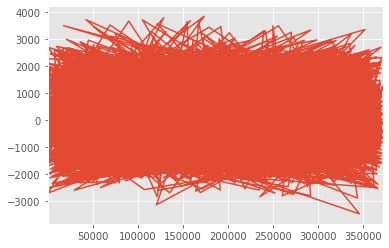

In [482]:
results = sm.ols(formula='price ~ abtest + vehicleType +yearOfRegistration+gearbox+powerPS+model+kilometer+monthOfRegistration+fuelType+brand+notRepairedDamage',\
                 data=df_train).fit()
Y_pred = results.predict(df_test[['abtest', 'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS',
       'model', 'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage']])
residual = df_test["price"].values-Y_pred
residual.plot()

In [483]:
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     2140.
Date:                Mon, 09 Sep 2019   Prob (F-statistic):               0.00
Time:                        02:58:01   Log-Likelihood:            -3.9170e+05
No. Observations:               46916   AIC:                         7.834e+05
Df Residuals:                   46904   BIC:                         7.835e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -5.865e+05   5

## Model performs poorly as though coef are statistically significant, all errors metrics are very high. The model does not fits well 

## Random Forest Regression

In [484]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

r2= r2_score(y_test, y_pred)
mae= np.mean(abs(y_test-y_pred))
rmse=np.sqrt(np.mean((y_test-y_pred)**2))
summary_df['Random Forest'] = [r2, mae, rmse]
summary_df

/Users/sulbha/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,Linear Regression,Random Forest
R-squared,0.344134,0.571512
Mean-Absolute-Error,811.040128,614.332712
Root-Mean-Squared-Error,1013.859763,819.482705


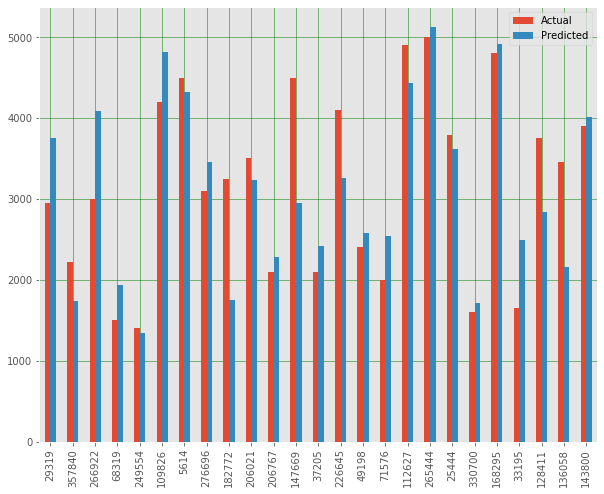

In [485]:
df_result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df_result.head(25)

df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## Decision Tree Regressor

In [486]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)

r2= r2_score(y_test, y_pred)
mae= np.mean(abs(y_test-y_pred))
rmse=np.sqrt(np.mean((y_test-y_pred)**2))
summary_df['Decision Tree Regressor'] = [r2, mae, rmse]
summary_df

,Linear Regression,Random Forest,Decision Tree Regressor
R-squared,0.344134,0.571512,0.361006
Mean-Absolute-Error,811.040128,614.332712,712.456712
Root-Mean-Squared-Error,1013.859763,819.482705,1000.734561


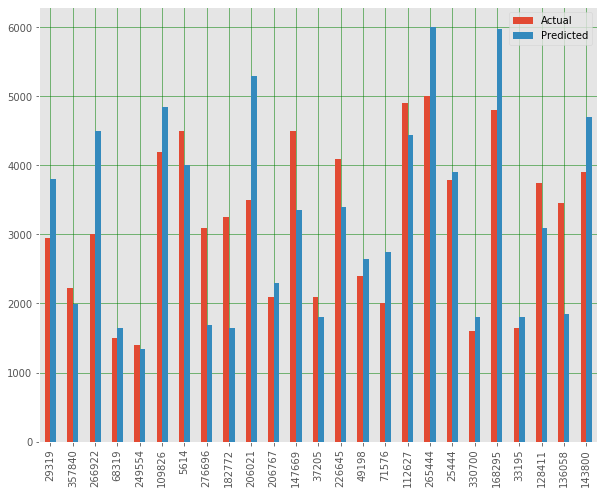

In [487]:
df_result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df_result.head(25)

df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## Gradient boosting Regressor with Hyper parameter tuning, Grid Search

In [488]:
# Parameter Tuning
tuned_params = {'n_estimators': [10, 20], 
                'max_depth': [2,4], 
                'min_samples_split': [2, 3],
                'learning_rate': [0.001, 0.01],
                'loss' :['ls']}
gscv = GridSearchCV(GradientBoostingRegressor(random_state=0), 
                    tuned_params, cv=5, scoring='neg_mean_squared_error')

# measure time
start = time()
gscv.fit(X_train, y_train)

print('The grid cross validation lasted {:0.1f} seconds'.format(time() - start))
print('Best parameters set found on development set:\n\t{}'.format(
        ', '.join(['{}: {}'.format(i,j) for i,j in gscv.best_params_.items()])))

The grid cross validation lasted 46.0 seconds
Best parameters set found on development set:
	learning_rate: 0.01, loss: ls, max_depth: 4, min_samples_split: 2, n_estimators: 20


In [489]:
# model fitting
params = gscv.best_params_
params['random_state'] = 123
params['loss'] = 'ls'
gbm = GradientBoostingRegressor(**params)

gbm.fit(X_train, y_train)
y_pred= gbm.predict(X_test)

r2= r2_score(y_test, y_pred)
mae= np.mean(abs(y_test-y_pred))
rmse=np.sqrt(np.mean((y_test-y_pred)**2))
summary_df['Gradient Boosting Regressor'] = [r2, mae, rmse]
print (summary_df)

                         Linear Regression  Random Forest  \
R-squared                         0.344134       0.571512   
Mean-Absolute-Error             811.040128     614.332712   
Root-Mean-Squared-Error        1013.859763     819.482705   

                         Decision Tree Regressor  Gradient Boosting Regressor  
R-squared                               0.361006                     0.109977  
Mean-Absolute-Error                   712.456712                   985.929789  
Root-Mean-Squared-Error              1000.734561                  1181.057648  


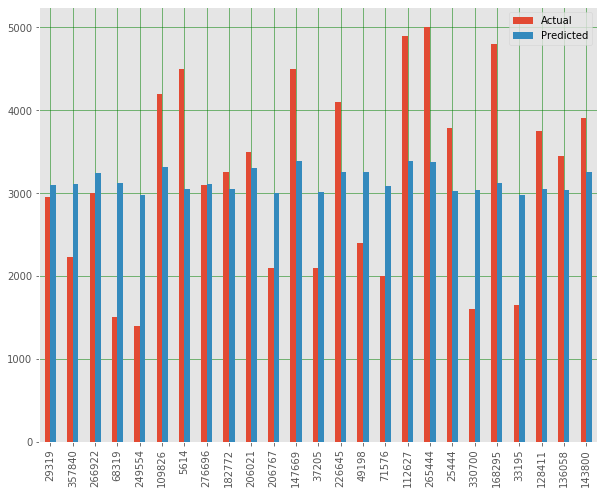

In [490]:
df_result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df_result.head(25)

df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## As gradient boosting is taking ~80 secs so exploring extreme gradient boosting which are much faster

In [491]:
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)
y_pred = xgbr.predict(X_test)

r2= r2_score(y_test, y_pred)
mae= np.mean(abs(y_test-y_pred))
rmse=np.sqrt(np.mean((y_test-y_pred)**2))
summary_df['XGB Regressor'] = [r2, mae, rmse]
summary_df

/Users/sulbha/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[02:58:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Linear Regression,Random Forest,Decision Tree Regressor,Gradient Boosting Regressor,XGB Regressor
R-squared,0.344134,0.571512,0.361006,0.109977,0.550866
Mean-Absolute-Error,811.040128,614.332712,712.456712,985.929789,661.698975
Root-Mean-Squared-Error,1013.859763,819.482705,1000.734561,1181.057648,838.992066


### Plot tree visualization for presentation to stakeholders: Extreme Gradient boosting

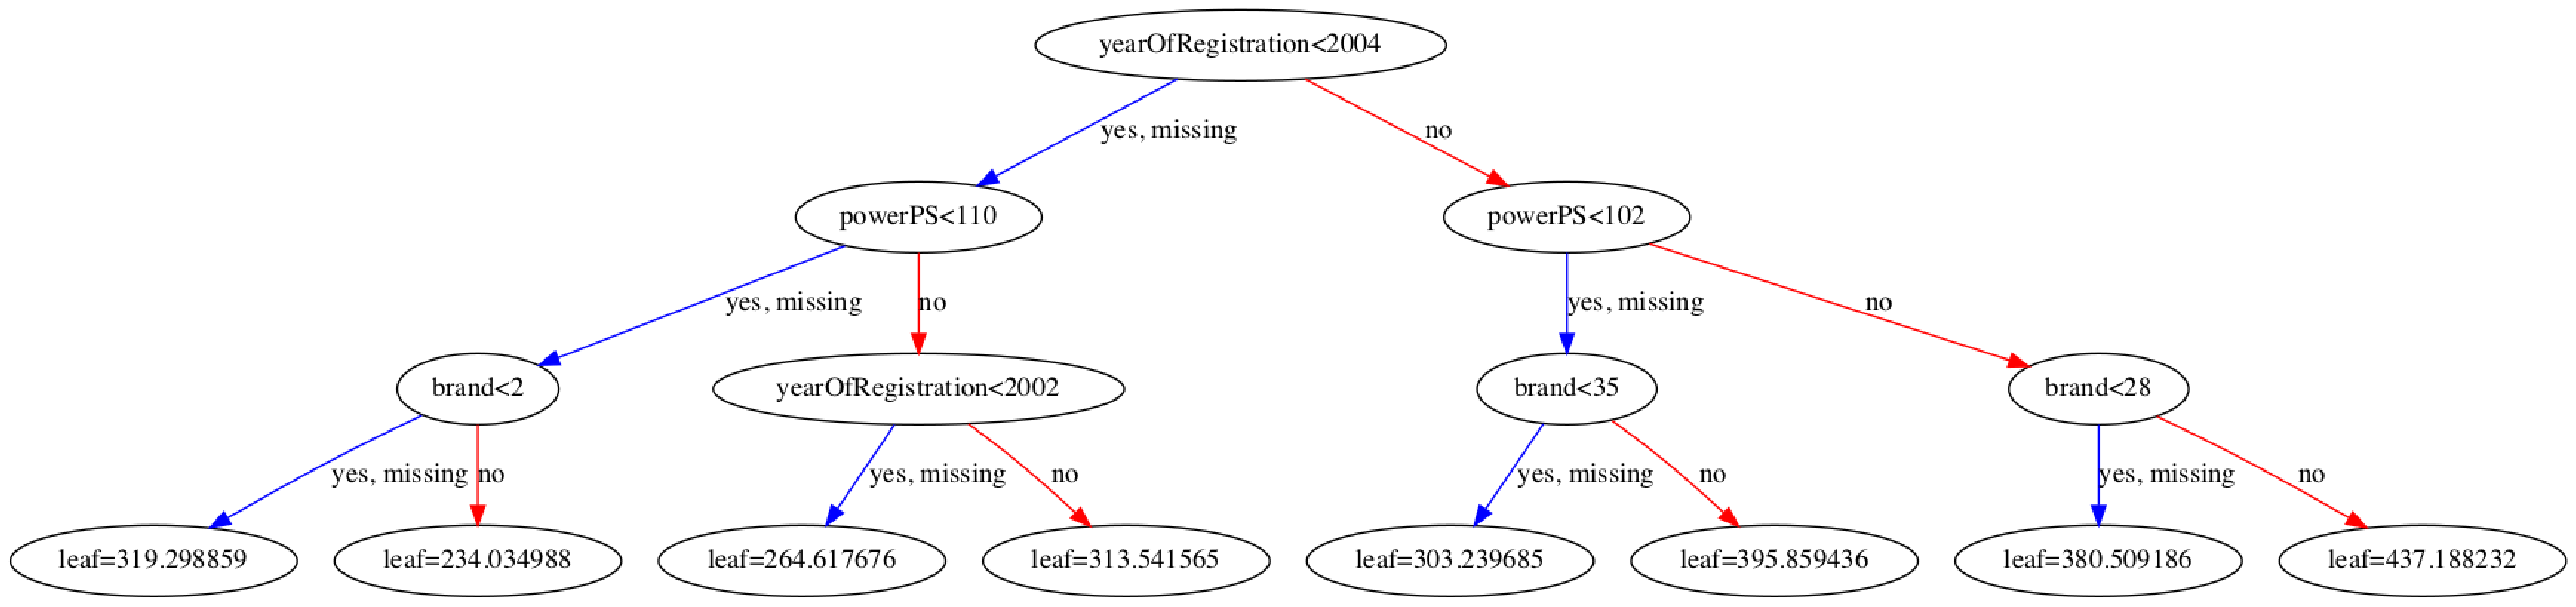

In [492]:
# plot tree graph
plot_tree(xgbr)
fig = plt.gcf()
fig.set_size_inches(160, 100)
fig.savefig('tree_Xgb.png')

Text(0.5, 1.0, 'Actual vs. Predicted Price')

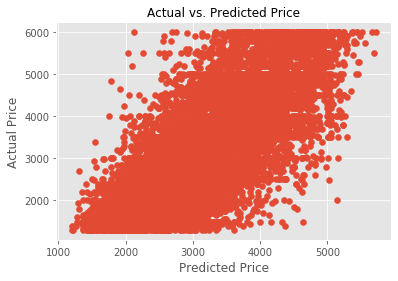

In [493]:
plt.scatter( y_pred, y_test)
plt.xlabel('Predicted Price', size=12)
plt.ylabel('Actual Price', size=12)
plt.title('Actual vs. Predicted Price', size=12)

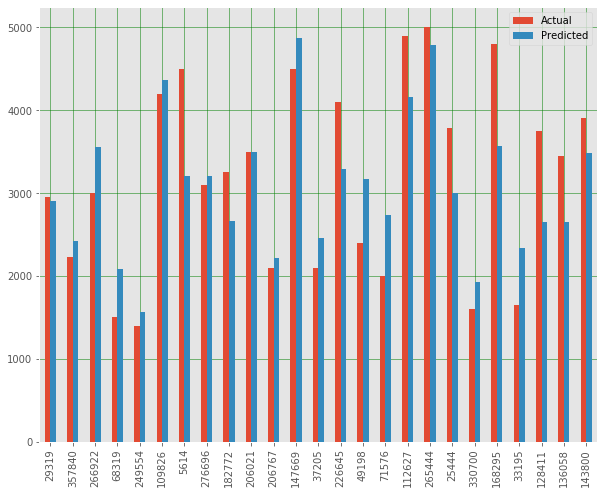

In [494]:
df_result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df_result.head(25)

df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## Exploring one last experimental Extreme GB for random forest

In [495]:
xgbrf = XGBRFRegressor()
xgbrf.fit(X_train, y_train)
y_pred = xgbrf.predict(X_test)

r2= r2_score(y_test, y_pred)
mae= np.mean(abs(y_test-y_pred))
rmse=np.sqrt(np.mean((y_test-y_pred)**2))
summary_df['XGB RF Regressor'] = [r2, mae, rmse]
summary_df

/Users/sulbha/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[02:59:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Linear Regression,Random Forest,Decision Tree Regressor,Gradient Boosting Regressor,XGB Regressor,XGB RF Regressor
R-squared,0.344134,0.571512,0.361006,0.109977,0.550866,0.309823
Mean-Absolute-Error,811.040128,614.332712,712.456712,985.929789,661.698975,843.497925
Root-Mean-Squared-Error,1013.859763,819.482705,1000.734561,1181.057648,838.992066,1040.040384


Text(0.5, 1.0, 'Actual vs. Predicted Price')

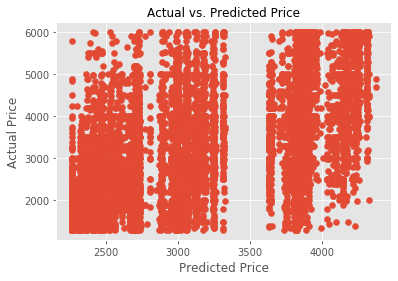

In [496]:
plt.scatter( y_pred, y_test)
plt.xlabel('Predicted Price', size=12)
plt.ylabel('Actual Price', size=12)
plt.title('Actual vs. Predicted Price', size=12)

## Also run light GB as it even efficiant than above boosting algos

In [497]:
lgbmr = LGBMRegressor()
lgbmr.fit(X_train, y_train)
y_pred = lgbmr.predict(X_test)

r2= r2_score(y_test, y_pred)
mae= np.mean(abs(y_test-y_pred))
rmse=np.sqrt(np.mean((y_test-y_pred)**2))
summary_df['Light GBM Regressor'] = [r2, mae, rmse]
summary_df

,Linear Regression,Random Forest,Decision Tree Regressor,Gradient Boosting Regressor,XGB Regressor,XGB RF Regressor,Light GBM Regressor
R-squared,0.344134,0.571512,0.361006,0.109977,0.550866,0.309823,0.610584
Mean-Absolute-Error,811.040128,614.332712,712.456712,985.929789,661.698975,843.497925,608.100781
Root-Mean-Squared-Error,1013.859763,819.482705,1000.734561,1181.057648,838.992066,1040.040384,781.227004


## Light GBM can be interpretated by SHAP, lime libraries

Text(0.5, 1.0, 'Actual vs. Predicted Price')

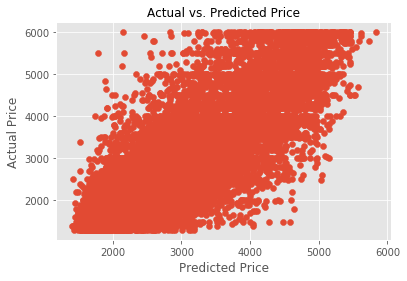

In [498]:
plt.scatter( y_pred, y_test)
plt.xlabel('Predicted Price', size=12)
plt.ylabel('Actual Price', size=12)
plt.title('Actual vs. Predicted Price', size=12)

### this looks much better than linear regression model

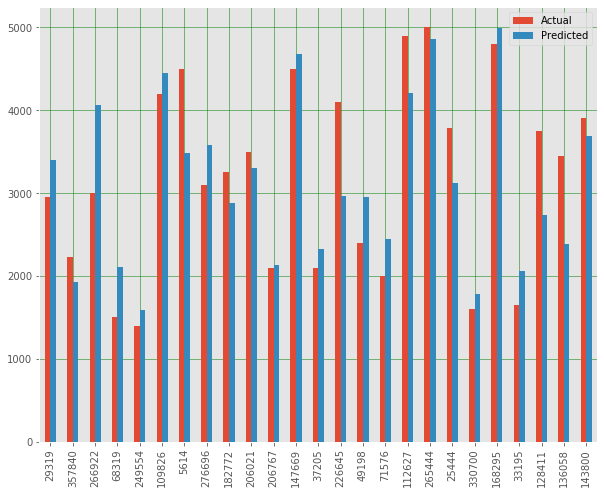

In [499]:
df_result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df_result.head(25)

df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## Cross Validation

In [500]:
X_train.columns

Index(['abtest', 'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS',
       'model', 'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage'],
      dtype='object')

In [501]:
# cross validation
def run_kfold(model, X_all, y_all):
    kf = KFold(n_splits=10)
    outcomes = []
    fold = 0
    for train_index, test_index in kf.split(X_all):
        fold += 1
        X_train, X_test = X_all.values[train_index], X_all.values[test_index]
        y_train, y_test = y_all.values[train_index], y_all.values[test_index]
        lr.fit(X_train, y_train)
        predictions = model.predict(X_test)
        r2 = r2_score(y_test, predictions)
        outcomes.append(r2)
        #print("Fold {0} r2_score: {1}".format(fold, r2))     
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome)) 
    return (mean_outcome)

CV_r2_lr = run_kfold(lr, X_train, y_train)
CV_r2_rfr = run_kfold(rfr, X_train, y_train)
CV_r2_dtr = run_kfold(dtr, X_train, y_train)
CV_r2_gbm = run_kfold(gbm, X_train, y_train)
#CV_r2_xgbr = run_kfold(xgbr, X_train, y_train)
#CV_r2_xgbrf = run_kfold(xgbrf, X_train, y_train)
CV_r2_lgbmr = run_kfold(lgbmr, X_train, y_train)


Mean Accuracy: 0.3336479382214999
Mean Accuracy: 0.8875642666380111
Mean Accuracy: 0.9453278891817274
Mean Accuracy: 0.10867375784330506
Mean Accuracy: 0.621665178403491


In [502]:
temp_df=pd.DataFrame(data=[[CV_r2_lr,CV_r2_rfr,CV_r2_dtr,CV_r2_gbm,'NA','NA',CV_r2_lgbmr]], columns=summary_df.columns,\
                     index=['CV R-squared'])
temp_df

,Linear Regression,Random Forest,Decision Tree Regressor,Gradient Boosting Regressor,XGB Regressor,XGB RF Regressor,Light GBM Regressor
CV R-squared,0.333648,0.887564,0.945328,0.108674,NA,NA,0.621665


In [503]:
summary_df= pd.concat([summary_df,temp_df], axis=0)
summary_df

,Linear Regression,Random Forest,Decision Tree Regressor,Gradient Boosting Regressor,XGB Regressor,XGB RF Regressor,Light GBM Regressor
R-squared,0.344134,0.571512,0.361006,0.109977,0.550866,0.309823,0.610584
Mean-Absolute-Error,811.040128,614.332712,712.456712,985.929789,661.699,843.498,608.100781
Root-Mean-Squared-Error,1013.859763,819.482705,1000.734561,1181.057648,838.992,1040.04,781.227004
CV R-squared,0.333648,0.887564,0.945328,0.108674,NA,NA,0.621665



### 1. CV R-squared is second best for Decision Tree Regressor at 0.94 however this is very slow algo so when run on big data it will not produce results. Even for such a small data set it was taking ~80 secs.
### 2. CV R-squared score is next best for random forest at 0.88. Though the performanc is good, it is essentially a black-box algorithm. It is hard to interpret and explain.
### 3. Extreme Gradient Boostning performed well at 0.55 (XGB) and 0.61 (Lgbm). Both these models are very well interpretable and efficient on resources. So either could be selected for optimization and deployment. 

### Next Steps - 
1. Data exploration - Discover correlation among features, eg. model vs. gearbox, vehicle type vs. brand etc. This could be useful for further feature engineering along with null value handling. 
2. Data Cleaning - handling null values, outliers 
3. Date Fields/Month/year exploration to look for correlation, pattern, Time Series forcasting using Holt-winter, ARIMA/SARIMAX, multivariate (VAR), univariate predictions etc.
4. One-hot encoding on categorical variables, currently the models are built by label encodng on categorical variables, however there could more optimized way to improve performance with OHE.
5. Explore other regression algos - Lasso, Ridge, 
6. Explore ensemble methods with paramter tuning.
7. Feature engg, scaling, Standarization/Min-Max, selection, Hyper parameter tuning. 